# Iterative Prompt Development
In this lesson, you'll iteratively analyze and refine your prompts to generate marketing copy from a product fact sheet.

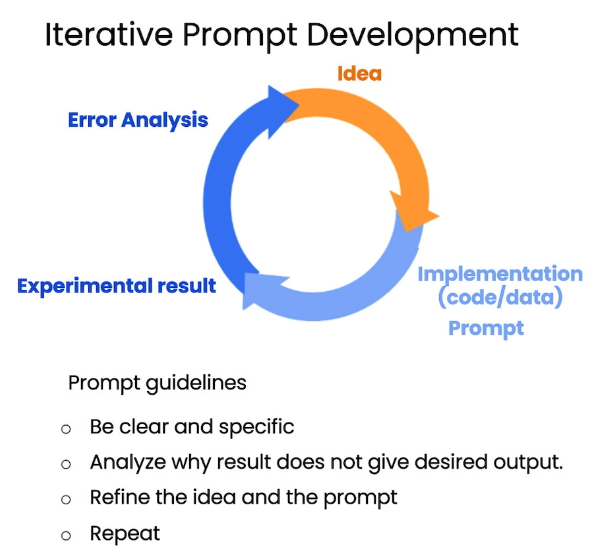

In [7]:
from openai import OpenAI
import os
from dotenv import load_dotenv

load_dotenv()

client = OpenAI(api_key = os.getenv('OPENAI_API_KEY'))

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content

## Generate a marketing product description from a product fact sheet

In [8]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [9]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our sleek and stylish mid-century inspired office chair, perfect for both home and business settings. This chair is part of a beautiful family of office furniture that includes filing cabinets, desks, bookcases, meeting tables, and more.

Customize your chair with several options of shell color and base finishes to match your decor. Choose between plastic back and front upholstery or full upholstery in a variety of fabric and leather options. The base finish options include stainless steel, matte black, gloss white, or chrome. You can also choose to have armrests or go for a more minimalist look without them.

Constructed with a 5-wheel plastic coated aluminum base and featuring a pneumatic chair adjust for easy raise/lower action, this chair is both durable and functional. The dimensions of the chair are as follows: width 53 cm, depth 51 cm, height 80 cm, seat height 44 cm, and seat depth 41 cm.

Customize your chair further with options such as soft or hard-floor caster o

## Issue 1: The text is too long 
- Limit the number of words/sentences/characters.

In [10]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our versatile and stylish mid-century office chair, available in a range of colors and finishes to suit any space. With adjustable height and comfortable upholstery options, this chair is perfect for both home and business use. Made in Italy with quality materials for durability. Elevate your workspace today!


In [11]:
len(response.split())

49

## Issue 2. Text focuses on the wrong details
- Ask it to focus on the aspects that are relevant to the intended audience.

In [12]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our versatile and stylish office chair, part of a mid-century inspired furniture collection. Constructed with a durable aluminum base and high-density foam seat for comfort. Choose from a variety of upholstery options and base finishes to suit any home or business setting. Made in Italy.


In [13]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

Introducing our versatile and stylish office chair, part of a mid-century inspired furniture collection. Choose from a variety of shell colors and base finishes to suit your space. Constructed with a durable aluminum base and high-density foam seat for comfort. Perfect for home or office use. 

Product IDs: SWC-100, SWC-110


## Issue 3. Description needs a table of dimensions
- Ask it to extract information and organize it in a table.

In [14]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
<p>Introducing our latest addition to the mid-century inspired office furniture collection - the versatile and stylish office chair. This chair is designed to elevate any workspace, whether it be at home or in a professional setting. With a variety of shell colors and base finishes to choose from, you can customize this chair to fit your aesthetic perfectly.</p>

<p>The construction of this chair is top-notch, featuring a 5-wheel plastic coated aluminum base for stability and mobility. The pneumatic chair adjust allows for easy raise and lower action, ensuring maximum comfort throughout the day.</p>

<p>When it comes to materials, this chair is built to last. The shell base glider is made of cast aluminum with a modified nylon PA6/PA66 coating, while the seat is cushioned with high-quality HD36 foam. With a shell thickness of 10 mm, you can trust that this chair is durable and reliable.</p>

<p>Product ID: SWC-100</p>
</div>

<table>
  <caption>Product Dimensions</caption>
  <tr>

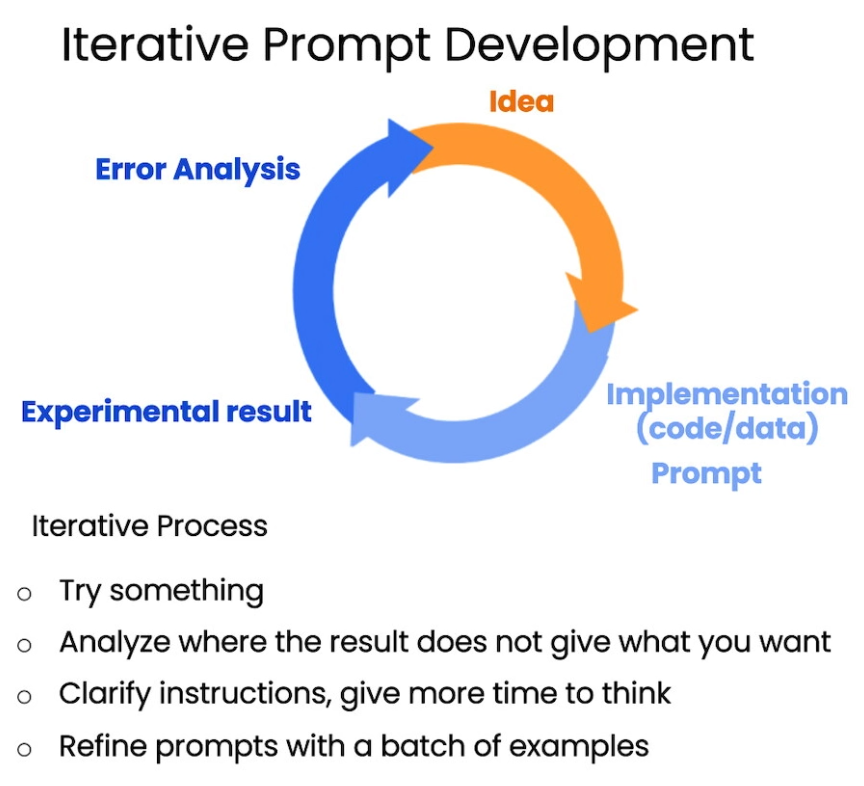

## Load Python libraries to view HTML

In [15]:
from IPython.display import display, HTML

display(HTML(response))

WIDTH,"20.87"""
DEPTH,"20.08"""
HEIGHT,"31.50"""
SEAT HEIGHT,"17.32"""
SEAT DEPTH,"16.14"""
